# titanic_train Use Case

We are going to perform analysis on titanic_train dataset. The input data is in .csv format with 891 obsevations. The dataset has total 12 columns with the below description

1. Passenger id- Unquie Id for each customer
2. Survived- Did the Passenger survive the accident or not?
3. PClass- Class the passenger boarded for the jouney
4. Name- Passenger name
5. Sex- Male or Female
6. Age- Passeneger's Age
7. Sibsp - Number of siblings/sopuses aboard
8. Parch- Number of Parents/Children Aboard
9. Ticket- Passenger Tickent Number
10. Fare- Amount Charged to the customer 
11. Cabin - Cabin Allocated to the custopmer
12. Embarked- Did the Passenger Board the ship 

Our Target Variable is "Survived" 



# Loading Dataset



In [101]:
import pandas as pd
df=pd.read_csv("titanic_train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df.shape


(891, 12)

# Importing Required Libraries

In [103]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# EDA


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [105]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [107]:
df['Age']=df["Age"].fillna((df["Age"].mean()))

In [108]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [109]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Univariate Analysis


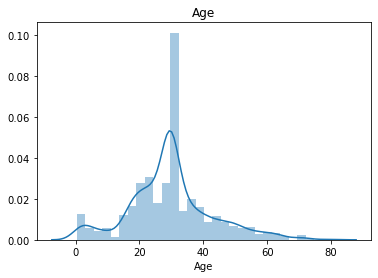

In [110]:
sb.distplot(df["Age"])
plt.title("Age")
plt.show()

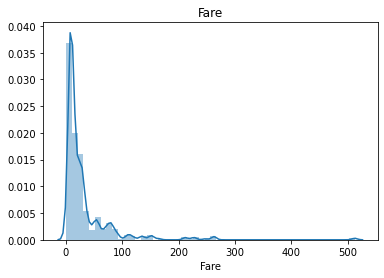

In [111]:
sb.distplot(df["Fare"])
plt.title("Fare")
plt.show()

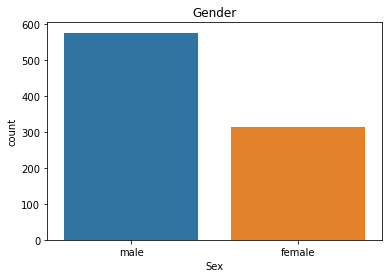

In [112]:
sb.countplot(df["Sex"])
plt.title("Gender")
plt.show()

# Mutivariate Analysis


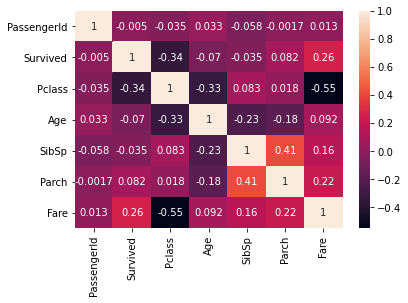

In [113]:

corr=df.corr()
sb.heatmap(corr,annot=True)
plt.show()

1.The heatmap shows there is low to nil co-relation between Survived and Passenger id, Parch, SibSp. Hence, the three columns can be dropped
2. There is a negative correlation between Survived and Plcass and a positive corelation betwwen Survived and Fare
 

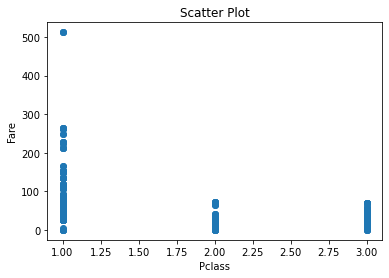

In [114]:
# Scatter plot

plt.scatter(df["Pclass"],df["Fare"])
plt.title("Scatter Plot")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()



In [115]:
df.drop("PassengerId",axis=1,inplace=True)

In [116]:
df.drop("Parch",axis=1,inplace=True)

In [117]:
df.drop("Name",axis=1,inplace=True)

In [118]:
df.drop("Ticket",axis=1,inplace=True)

In [119]:
df.drop("Cabin",axis=1,inplace=True)

In [120]:
df.drop("Embarked",axis=1,inplace=True)

In [121]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


# Encoding Data

In [122]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Sex"]


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

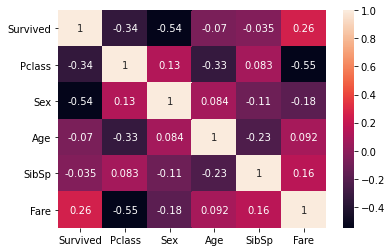

In [123]:

corr=df.corr()
sb.heatmap(corr,annot=True)
plt.show()


# Detecting Outliers

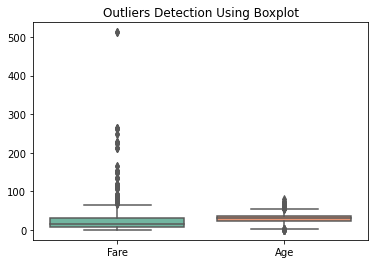

In [124]:
sb.boxplot(data=df[["Fare", "Age"]], palette="Set2")
plt.title("Outliers Detection Using Boxplot")
plt.show()

In [125]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Fare        4.787317
dtype: float64

PClass and Sex is little bit skewed 
Fare data has large Skewness

# Preparing dataset for Model Training



In [126]:
# Separating independent and target variable

x=df.drop("Survived",axis=1)
y=df["Survived"]

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=200)

# Scaling


In [130]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(x)

# Finding Best Model

In [136]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
model=[GaussianNB(), SVC(),DecisionTreeClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ", m, "is:")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')
    


Accuracy score of  GaussianNB() is:
0.7762711864406779
[[151  31]
 [ 35  78]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       182
           1       0.72      0.69      0.70       113

    accuracy                           0.78       295
   macro avg       0.76      0.76      0.76       295
weighted avg       0.77      0.78      0.78       295



Accuracy score of  SVC() is:
0.6915254237288135
[[168  14]
 [ 77  36]]
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       182
           1       0.72      0.32      0.44       113

    accuracy                           0.69       295
   macro avg       0.70      0.62      0.61       295
weighted avg       0.70      0.69      0.65       295



Accuracy score of  DecisionTreeClassifier() is:
0.7491525423728813
[[150  32]
 [ 42  71]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     

In [ ]:
import pickle
filename="Project1_titanic_test.pkl"
pickle.dump(GaussianNB, open(filename, "wb"))
